In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage


In [2]:
#datasets

hdi1=pd.read_csv("GDL-Human-Development-(2019)-data.csv")
hdi2=pd.read_csv("GDL-Human-Development-(2020)-data.csv")
hdi3=pd.read_csv("GDL-Human-Development-(2021)-data.csv")

h1=hdi1['Subnational HDI']
h2=hdi2['Subnational HDI']
h3=hdi3['Subnational HDI']

data1=pd.read_csv("India_SDG_Index_Rank_Data_2019.csv")
data2=pd.read_csv("India_SDG_Index_Rank_Data_2020.csv")
data3=pd.read_csv("India_SDG_Index_Rank_Data_2021.csv")




In [3]:
con_1=pd.concat([hdi1['Subnational HDI'],hdi2['Subnational HDI'],hdi3['Subnational HDI']],axis=1)

con_1




,Subnational HDI,Subnational HDI,Subnational HDI
0,0.645,0.642,0.633
1,0.642,0.639,0.630
2,0.677,0.674,0.665
3,0.609,0.606,0.597
4,0.581,0.578,0.571
5,0.617,0.614,0.605
6,0.765,0.761,0.751
7,0.650,0.646,0.638
8,0.704,0.701,0.691
9,0.717,0.713,0.703


In [4]:
con_2=pd.concat([data1,data2,data3],axis=1)
con_2



,2018,2019,AREA,Goal 10,2019,2020,AREA,Goal 10,2020,2021,AREA,Goal 10
0,71,64,India,64,64,67,India,67,64,67,India,67
1,75,68,Andhra Pradesh,68,68,74,Andhra Pradesh,74,68,74,Andhra Pradesh,74
2,47,38,Arunachal Pradesh,38,38,69,Arunachal Pradesh,69,38,69,Arunachal Pradesh,69
3,75,67,Assam,67,67,65,Assam,65,67,65,Assam,65
4,82,74,Bihar,74,74,48,Bihar,48,74,48,Bihar,48
5,73,60,Chhattisgarh,60,60,72,Chhattisgarh,72,60,72,Chhattisgarh,72
6,50,19,Goa,19,19,75,Goa,75,19,75,Goa,75
7,79,59,Gujarat,59,59,64,Gujarat,64,59,64,Gujarat,64
8,55,54,Haryana,54,54,68,Haryana,68,54,68,Haryana,68
9,98,78,Himachal Pradesh,78,78,78,Himachal Pradesh,78,78,78,Himachal Pradesh,78


In [5]:
con_2.drop(['2018','2019','2020','2021','AREA'],axis=1,inplace=True)
con_2


,Goal 10,Goal 10,Goal 10
0,64,67,67
1,68,74,74
2,38,69,69
3,67,65,65
4,74,48,48
5,60,72,72
6,19,75,75
7,59,64,64
8,54,68,68
9,78,78,78


In [6]:

data=pd.concat([con_1,con_2],axis=1)
data



,Subnational HDI,Subnational HDI,Subnational HDI,Goal 10,Goal 10,Goal 10
0,0.645,0.642,0.633,64,67,67
1,0.642,0.639,0.630,68,74,74
2,0.677,0.674,0.665,38,69,69
3,0.609,0.606,0.597,67,65,65
4,0.581,0.578,0.571,74,48,48
5,0.617,0.614,0.605,60,72,72
6,0.765,0.761,0.751,19,75,75
7,0.650,0.646,0.638,59,64,64
8,0.704,0.701,0.691,54,68,68
9,0.717,0.713,0.703,78,78,78


In [7]:
# Remove rows where the Location Description is missing
data.dropna(subset=['Goal 10'], inplace=True)
data



,Subnational HDI,Subnational HDI,Subnational HDI,Goal 10,Goal 10,Goal 10
0,0.645,0.642,0.633,64,67,67
1,0.642,0.639,0.630,68,74,74
2,0.677,0.674,0.665,38,69,69
3,0.609,0.606,0.597,67,65,65
4,0.581,0.578,0.571,74,48,48
5,0.617,0.614,0.605,60,72,72
6,0.765,0.761,0.751,19,75,75
7,0.650,0.646,0.638,59,64,64
8,0.704,0.701,0.691,54,68,68
9,0.717,0.713,0.703,78,78,78


In [8]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std



array([[-0.42756504, -0.42392281, -0.4322092 ,  0.02201272,  0.0533979 ,
         0.0533979 ],
       [-0.49126051, -0.48806418, -0.49715255,  0.30573224,  0.69103167,
         0.69103167],
       [ 0.25185338,  0.26025174,  0.26051988, -1.82216413,  0.23557898,
         0.23557898],
       [-1.19191075, -1.19361918, -1.21152941,  0.23480236, -0.12878317,
        -0.12878317],
       [-1.78640186, -1.79227192, -1.77437179,  0.73131151, -1.67732232,
        -1.67732232],
       [-1.02205615, -1.02257555, -1.03834714, -0.26170679,  0.50885059,
         0.50885059],
       [ 2.12025401,  2.12035131,  2.12222928, -3.16983183,  0.7821222 ,
         0.7821222 ],
       [-0.32140591, -0.33840099, -0.32397028, -0.33263667, -0.21987371,
        -0.21987371],
       [ 0.82511266,  0.83752402,  0.82336226, -0.68728607,  0.14448844,
         0.14448844],
       [ 1.10112639,  1.09408948,  1.08313566,  1.01503103,  1.05539382,
         1.05539382],
       [-1.38299718, -1.38604328, -1.38471168,  0.

In [9]:
# Perform single linkage clustering with 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
cluster_labels=cluster.fit_predict(data_std)
cluster.fit(data_std)


AgglomerativeClustering(linkage='complete', n_clusters=3)

In [10]:
# Add the cluster labels to the original dataset
data["cluster"] = cluster.labels_




In [11]:
# Print the number of samples in each cluster
print(data["cluster"].value_counts())



2    11
1    10
0     8
Name: cluster, dtype: int64


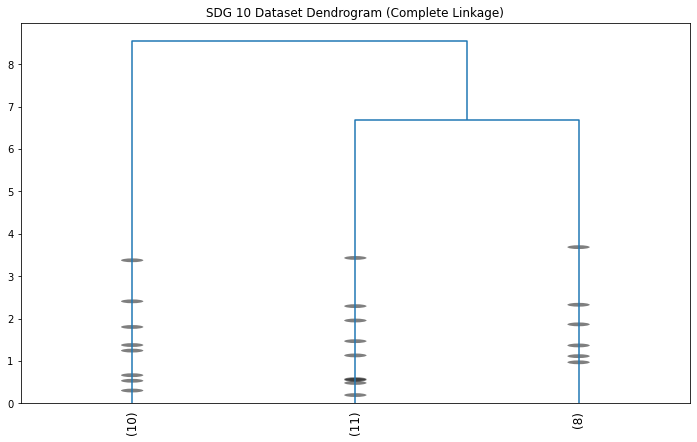

In [12]:
# No.of total clusters

plt.figure(figsize=(12, 7))
plt.title("SDG 10 Dataset Dendrogram (Complete Linkage)")
dend = dendrogram(
    linkage(data_std, method='complete'),
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=3,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # Collapse all intermediate nodes
)
plt.show()



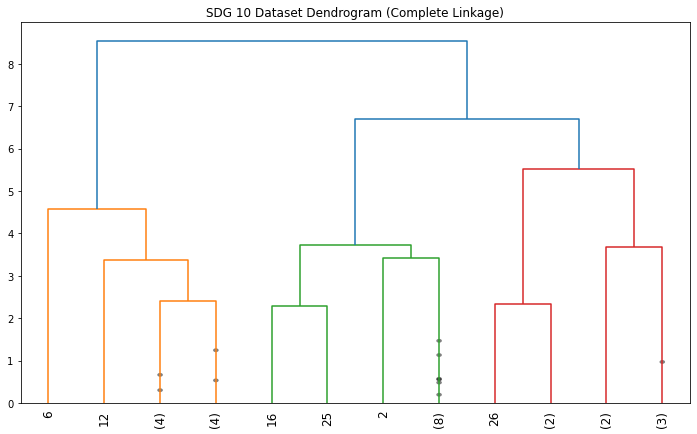

In [13]:
plt.figure(figsize=(12, 7))
plt.title("SDG 10 Dataset Dendrogram (Complete Linkage)")
dend = dendrogram(
    linkage(data_std, method='complete'),
    truncate_mode='level',  # Show only the last p merged clusters
    p=3,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # Collapse all intermediate nodes
)
plt.show()



In [14]:
#Accuracy using sihouette_score
from sklearn.metrics import silhouette_score

In [15]:
silhouette = silhouette_score(data_std, cluster_labels)
print(f"Silhouette score: {silhouette}")

Silhouette score: 0.25730972579002004
